In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [71]:
blood = pd.read_csv('./blood_pressure.csv')
blood['diet'] = blood['diet'].replace({'0': 'no'})
blood = blood[blood['height'] != 0]
blood = blood[blood['blood_pressure'] != 0]
blood['age_height'] = np.log((blood['age']*blood['height']))
blood['food_agregate'] = (blood['water']*blood['carbs']*blood['fiber']*blood['protien']*blood['sugar'])
blood['drugs'] = (blood['marijuana_use']*blood['cocaine_uses'])
blood['substances'] = (blood['fats']*blood['cholesterol']*blood['alchohol']*blood['caffeine'])
blood[:10].T
blood[:10].T

,0,1,2,3,4,5,6,7,8,9
SEQN,93711.0,93716.0,93717.0,93721.0,93723.0,93726.0,93728.0,93738.0,93743.0,93746.0
blood_pressure,68.0,72.0,62.0,68.0,72.0,52.0,74.0,82.0,86.0,64.0
systolic_blood_pressure,108.0,120.0,116.0,132.0,124.0,140.0,122.0,120.0,152.0,106.0
weight,62.1,77.7,74.4,85.1,64.9,74.3,118.1,97.7,79.3,62.1
height,170.6,159.2,174.1,154.0,170.1,154.5,188.1,170.2,187.8,158.4
bmi,21.3,30.7,24.5,35.9,22.4,31.1,33.4,33.7,22.5,24.8
salt_type,ordinary,ordinary,ordinary,no_extra_salt,ordinary,ordinary,ordinary,salt_substitute,ordinary,ordinary
diet,yes,no,no,no,no,no,no,yes,no,no
protien,101.33,103.91,97.12,79.98,41.62,81.89,80.0,116.36,175.55,80.67
carbs,339.6,442.98,345.52,226.61,269.6,184.99,213.19,50.95,684.76,222.26


In [83]:
m1 = smf.ols('blood_pressure ~ age + height + bmi + alchohol + marijuana_use + min_vig_rec + C(race) + C(gender)', blood).fit()
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m1.summary()

{'LM Statistic': 39.6996489196044, 'LM-Test p-value': 4.026244208588668e-05}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.98e-63
Time:                        18:45:33   Log-Likelihood:                -10105.
No. Observations:                2642   AIC:                         2.023e+04
Df Residuals:                    2630   BIC:                         2.030e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      33.8724      5.515      6.142      0.000      23.058      44.687
C(race)[T.mexican_american]    -0.5844      0.760     -0.769      0.442      -2.074       0.905
C(race)[T.multi_racial]         1.3076      0.703      1.861      0.063      -0.070       2.685
C(race)[T.other_hispanic]      -0.9789      0.870     -1.125      0.261      -2.685       0.728
C(race)[T.white]               -0.8670      0.603     -1.437      0.151      -2.050       0.316
C(gender)[T.male]               1.6230      0.621      2.614      0.009       0.406       2.840
age                             0.1954      0.015     12.751      0.000       0.165       0.225
height                          0.1478      0.033      4.511      0.000       0.084       0.212
bmi                             0.1833      0.030      6.012      0.000       0.124       0.243
alchohol                        0.0072      0.008      0.863      0.388      -0.009       0.023
marijuana_use                   0.0382      0.145      0.263      0.792      -0.246       0.323
min_vig_rec                    -0.0067      0.005     -1.291      0.197      -0.017       0.003
==============================================================================
Omnibus:                       42.335   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.279
Skew:                           0.117   Prob(JB):                     3.33e-16
Kurtosis:                       3.770   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + bmi + cocaine_uses + C(gender) + C(race)', blood).fit()
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 3.157007549530931, 'LM-Test p-value': 0.9241213396841299}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.136
Model:                                OLS   Adj. R-squared:                  0.134
Method:                     Least Squares   F-statistic:                     51.90
Date:                    Sun, 08 Oct 2023   Prob (F-statistic):           1.88e-78
Time:                            18:45:49   Log-Likelihood:                 1199.5
No. Observations:                    2642   AIC:                            -2381.
Df Residuals:                        2633   BIC:                            -2328.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.0754      0.069     44.565      0.000       2.940       3.211
C(gender)[T.male]               0.0376      0.006      6.182      0.000       0.026       0.050
C(race)[T.mexican_american]    -0.0139      0.010     -1.372      0.170      -0.034       0.006
C(race)[T.multi_racial]         0.0128      0.009      1.352      0.177      -0.006       0.031
C(race)[T.other_hispanic]      -0.0198      0.012     -1.684      0.092      -0.043       0.003
C(race)[T.white]               -0.0118      0.008     -1.413      0.158      -0.028       0.005
age_height                      0.1266      0.008     16.275      0.000       0.111       0.142
bmi                             0.0023      0.000      5.563      0.000       0.002       0.003
cocaine_uses                    0.0081      0.002      3.242      0.001       0.003       0.013
==============================================================================
Omnibus:                      181.454   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.499
Skew:                          -0.531   Prob(JB):                     6.81e-65
Kurtosis:                       4.248   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
sm.stats.anova_lm(m2, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),0.312411,1.0,21.547949,3.620069e-06
C(race),0.630072,4.0,10.864497,9.773160e-09
age_height,8.005932,1.0,552.193419,5.208058e-111
bmi,1.371757,1.0,94.614248,5.400287e-22
cocaine_uses,0.055745,1.0,3.844879,5.000339e-02
Residual,38.174340,2633.0,NaN,NaN


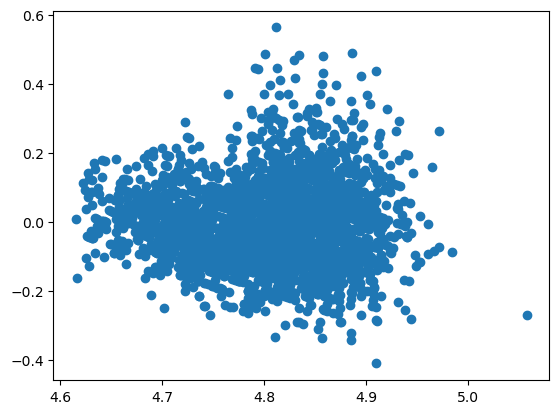

In [82]:
resid = m2.resid
values = m2.fittedvalues
plt.scatter(values, resid)

In [893]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))

{'LM Statistic': 13.769308164886182, 'LM-Test p-value': 0.008068919203851199}


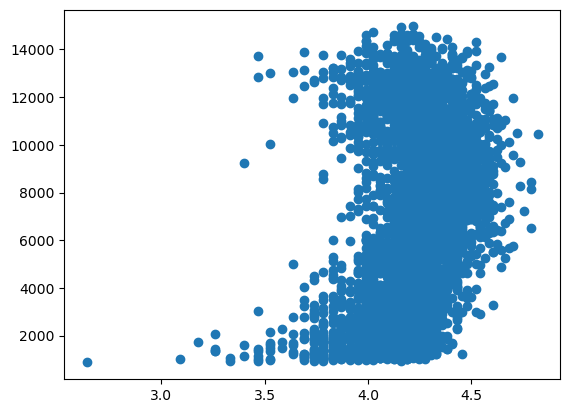

In [880]:
plt.scatter(np.log(blood['blood_pressure']), blood['height']*blood['age'])